# Verschiedene Fit-Funktionen 

## Messdaten: Karussel

Wir stellen uns im Folgenden ein Kinderkarussel vor und wir wollen die Geschwindigkeit der Feuerwehrautos ermitteln. Das Auto selbst verfügt über kein Tachometer - es bleibt also eigentlich nur die Möglichkeit, die Zeit eines Umlaufs zu stoppen und aus der Geometrie des Karussells den zurückgelegten Weg zu bestimmen. Daraus lässt sich die Geschwindigkeit leicht berechnen.

Beispielsweise könnte man die Zeit nach jedem Umlauf messen, die näherungsweise konstant sein sollte (bis auf die 1. Runde, wo noch beschleunigt wird). Es könnte sich also ein linearer Zusammenhang zwischen zurückgelegtem Weg und der benötigten Zeit vermuten:

$$y = m\cdot x + b \Rightarrow y - b - m\cdot x = 0$$

Folgende Messwerte wurden ermittelt:

* Weg  $x$ (m): 12, 24, 36, 42, 60, 72, 84, 96, 108, 120
* Zeit $t$ (s): 12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1

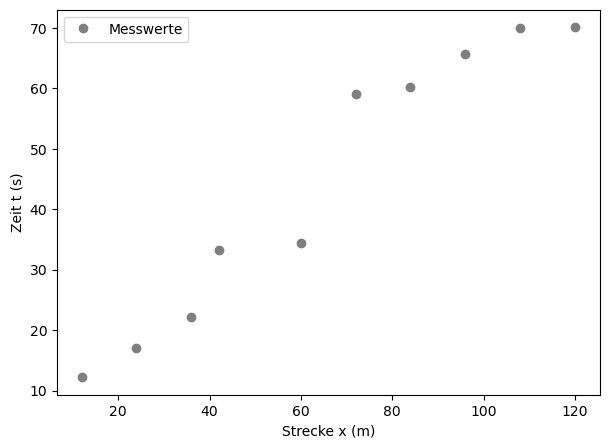

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(7,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

x = [12, 24, 36, 42, 60, 72, 84, 96, 108, 120] # Messwerte der Strecke x in m
t = [12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1] # Messwerte der Zeit t in sek.
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array
t = np.array(t) #konvertiere die Messwerte in ein Numpy-Array

plt.plot(x,t, 'o', label = 'Messwerte', ms=6, color="tab:gray")
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

## Analytische Lineare Regression

Weitere Information findest du [hier](1_Kurvenanpassung) im Vorlesungsskript.

Die Steigung ist 		 m = 0.6067 s/m
Der Ordinatenabschnitt ist 	 b = 4.7148 s


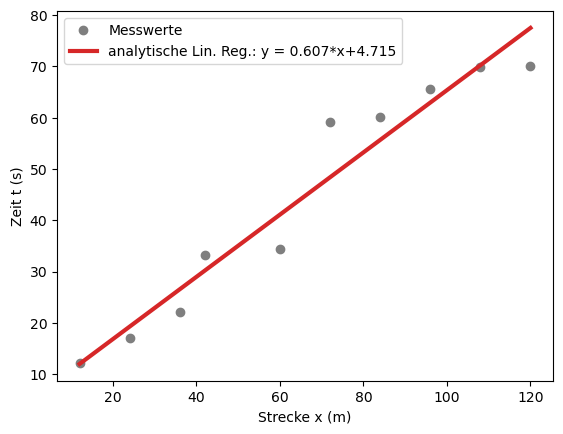

In [2]:
m = (np.mean(x*t) - np.mean(x)*np.mean(t))/(np.mean(x**2) - np.mean(x)**2)
b = np.mean(t) - m * np.mean(x)
print('Die Steigung ist \t\t m = %5.4f s/m' %(m))
print('Der Ordinatenabschnitt ist \t b = %5.4f s' %(b))

plt.plot(x,t, 'o', label = 'Messwerte', ms=6, color="tab:gray")
plt.plot(x,m*x+b,lw=3, color="tab:red", label = 'analytische Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()


## Lineare Regression mit Python: scipy <a id="SubSec-scipy_LinReg"></a>

Mit einem Datenanalyseprogramm, sei es hier in Python oder in Matlab oder Maple, können Hilfsfunktionen und Pakete geladen werden, um Fit-Funktionen automatisch auf Messwerte anzupassen. Dies ist in der Regel schneller und insbesondere auch für andere Zusammenhänge, neben linearen Zusammenhängen, viel einfacher in der Umsetzung. Man sollte jedoch stets das Ergebnis kontrollieren, z.B. anhand von grafischen Darstellungen, und sich die Unsicherheiten genau ansehen. Desweiteren können in der Fitroutine Startparameter angegeben werden, welche den Schätzwerten schon recht nah sein sollten. Das Fitergebnis kann nämlich unter Umständen sehr stark von der Wahl der Startparameter abhängen, gerade wenn es um komplexere Fitfunktionen geht. Im Folgenden wollen wir uns aber noch einmal das Beispiels das Karussels ansehen, um die beiden Methoden miteinander zu vergleichen. 

Als erstes definieren wir uns eine allgemein lineare Fitfunktion und anschließend nutzen wir das scipy-Paket und rufen die Optimierungsfunktion auf, um unsere Messwerte zu modellieren. Die Ausgangsparameter werden in einem weiteren Array abgespeichert, welches einerseits die gesuchten Variablen $m$ und $b$ beinhaltet, andererseits die Kovarianzmatrix enthält. Aus der Wurzel die Diagonalelemente dieser Kovarianzmatrix erhält man die Standardabweichung der bestimmten Variablen. 

Die scipy-Fitparameter lauten:
Die Steigung ist 		 m = (0.6067 +- 0.0534) s/m
Der Ordinatenabschnitt ist 	 b = (4.7148 +- 3.9581) s


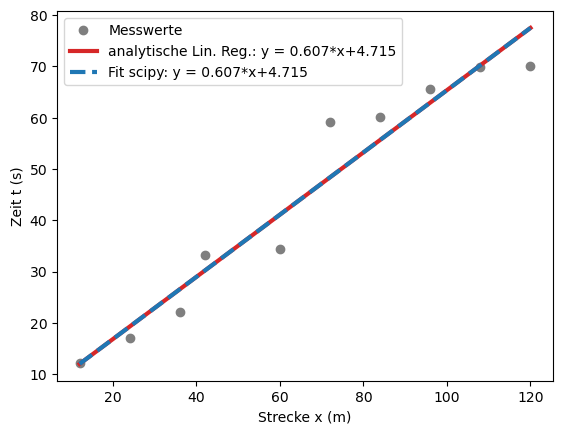

In [3]:
from scipy.optimize import curve_fit

def fit_lin(x, b, a): # Fit Funktion für eine Gerade mit Steigung b
    return b*x + a

# Fit der Daten:
fit_out = curve_fit(fit_lin, x, t)

print('Die scipy-Fitparameter lauten:')
print('Die Steigung ist \t\t m = (%5.4f +- %5.4f) s/m' %(fit_out[0][0], np.sqrt(fit_out[1][0][0])))
print('Der Ordinatenabschnitt ist \t b = (%5.4f +- %5.4f) s' %(fit_out[0][1], np.sqrt(fit_out[1][1][1])))

plt.plot(x,t, 'o', label = 'Messwerte', ms=6, color="tab:gray")
plt.plot(x,m*x+b,lw=3, color="tab:red", label = 'analytische Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.plot(x,fit_out[0][0]*x+fit_out[0][1], '--',lw=3, color="tab:blue", label = 'Fit scipy: y = %5.3f*x+%5.3f' %(fit_out[0][0],fit_out[0][1]))  # plot Fitfunktion mit b und a
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

Man erkennt, dass die Regressionskoeffizienten der beiden Methoden sehr gut übereinstimmen. Die Unterschiede betragen lediglich:

In [4]:
print('Unterschied in den Steigungen: \t\t  %5.3e' %(m-fit_out[0][0]))
print('Unterschied in den Ordinatenabschnitten: %5.3e' %(b-fit_out[0][1]))

Unterschied in den Steigungen: 		  8.582e-13
Unterschied in den Ordinatenabschnitten: -8.125e-12


## Lineare Regression mit Python: lmfit <a id="SubSec-lmfit_LinReg"></a>

Prinzipiell ist es wundervoll für Python für die Optimierung von Problemenen zu nutzen und das scipy-Paket bietet sehr robuste und einfach Nutzung. Andererseits unterscheidet sich das Verfahen nicht besonders von denjenigen, die wir in C oder Fortran bekommen würden. D.h. es gibt einige Herausforderungen in der praktischen Anwendung, warum scipy nicht die optimale Wahl ist:
* Der Benutzer muss sich die Reihenfolge der Variablen und deren Bedeutung merken. (Was war noch mal fit_out[0][0], die Steigung oder der Ordinatenabschnitt?)
* Wenn ich eine Variable nicht fitten möchte, also ich möchte zum Beispiel die Steigung auf fest Null setzen, so muss ich mir eine neue Funktion ohne diese Variable definieren. Insbesondere für komplexere Funktionen und Zusammenhänge wird dieses Verfahren schnell unübersichtlich. Einfacher wäre es, der Optimierungsfunktion zu sagen, welche Variablen ich in diesem Durchlauf gefittet haben möchte, und welche konstant bleiben sollen.
* Zwischen den verschiedenen Variablen können keine Beziehungen hergestellt werden. Es können lediglich Grenzen angegeben werden, in denen sich die Variablen befinden. 

Der Grund für die eingeschränkte Nutzung hat historische Gründe und basiert hauptsächlich auf Fit-Routinen, die beispielsweise für C oder Fortran entwickelt wurden. Python bietet aber mehr, da es unterschiedlich Objekte und Datenstrukturen bietet, statt nur mit Arrays zu rechnen. Daher möchten wir uns noch einem etwas besser geeignetem Paket widmen, und das eben vorgestellt Beispiel noch einmal durchrechnen. 

Das Paket lmfit definiert und benutzt Parameterobjekte anstelle von einfachen Zahlen als Variablen. Dies hat folgende Vorteile:
* Wir müssen uns endlich keine Reihenfolgen von Variablen mehr merken, wir können ihn ab sofort bedeutungsvolle Namen geben.
* Es müssen keine Arrays mehr für Grenzen eingegeben werden und die Reihenfolge der Grenzen, im Array, die vorher durch die Reihenfolge Variablen bestimmt war, spielt nun auch keine Rolle mehr.
* Wir können einfach Parameter fixieren ohne Zielfunktionen neu definieren zu müssen. 
* Algebraische Beschänkungen der Parameter sind ab sofort möglich.

Eine ausführliche Dokumentation findet man hier: https://lmfit.github.io/lmfit-py/index.html

lmfit hat eine eigene print-Ausgabe:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     4.715     -inf      inf    3.958     True     None     None
steigung     0.6067     -inf      inf  0.05342     True     None     None

Fit Report:
[[Model]]
    Model(f_lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 276.888038
    reduced chi-square = 34.6110047
    Akaike info crit   = 37.2102814
    Bayesian info crit = 37.8154516
[[Variables]]
    steigung:   0.60665381 +/- 0.05342018 (8.81%) (init = 0.7)
    abschnitt:  4.71484116 +/- 3.95814322 (83.95%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(steigung, abschnitt) = -0.883


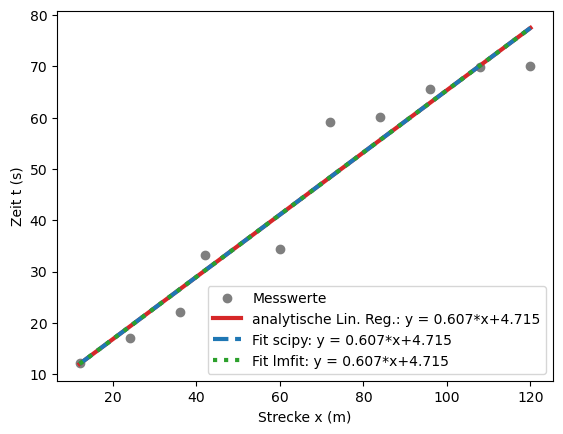

In [5]:
from lmfit import minimize, Parameters
from lmfit import Model

def f_lin(x, steigung, abschnitt):
    return steigung*x + abschnitt

model = Model(f_lin)
params = model.make_params(steigung=0.7, abschnitt=10.0)
result = model.fit(t, params, x=x)

print('lmfit hat eine eigene print-Ausgabe:')
result.params.pretty_print()

print()
print('Fit Report:')
print(result.fit_report())

plt.plot(x,t, 'o', label = 'Messwerte', ms=6, color="tab:gray")
plt.plot(x,m*x+b,lw=3, color="tab:red", label = 'analytische Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.plot(x,fit_out[0][0]*x+fit_out[0][1], '--',lw=3, color="tab:blue", label = 'Fit scipy: y = %5.3f*x+%5.3f' %(fit_out[0][0],fit_out[0][1]))  # plot Fitfunktion mit b und a
plt.plot(x,result.best_fit, ':',lw=3, color="tab:green", label = 'Fit lmfit: y = %5.3f*x+%5.3f' %(result.params['steigung'].value,result.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

Anhand der ausführlichen Ausgabe erkennt man sofort, wie viele Informationen man aus der Benutzung dieses Paketes ziehen kann, ohne aufwendige Fehlerfortpflanzung betreiben zu müssen. Außerdem kann man Beispielsweise die Fit-Methode ändern (anstelle von least-squares), man kann sich die Anfangs-Fitfunktion ansehen (und parallel zur 'besten' Fit-Funktion anzeigen lassen), man kann Parameter konstant setzen oder sich Standardfehler, $\chi^2$ und Korrelationen (zwischen den Fit-Parametern, nicht den Messwerten!) ausgeben lassen. 